In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
tf.__version__

'2.18.0'

In [4]:
keras.__version__

'3.7.0'

# Train / Test Split

## keras

### .datasets.fashion_mnist

In [5]:
fashion_mnist = keras.datasets.fashion_mnist

#### .load_data()

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [6]:
X_train_full # each value ranging from 0 to 255

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [7]:
X_train_full.shape

(60000, 28, 28)

In [8]:
y_train_full # 10 classes represented as integers (multiclass, 0-9)

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [9]:
y_train_full.shape

(60000,)

# Validation Set Split

In [10]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0

In [11]:
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [12]:
X_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [36]:
X_train.shape

(55000, 28, 28)

In [13]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

# Class names

In [14]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [15]:
class_names[y_train[0]]

'Coat'

# Model Building

## keras.models.Sequential()

In [16]:
model = keras.models.Sequential()

### .add()

In [17]:
import warnings
warnings.filterwarnings("ignore")

model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

### .summary()

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

### .layers

In [19]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

#### .get_weights()

In [20]:
weights, biases = model.layers[1].get_weights()

In [21]:
weights

array([[ 0.02729949,  0.03025411,  0.03549854, ..., -0.02681506,
        -0.05464506,  0.0181965 ],
       [-0.02374368,  0.0579945 , -0.04936907, ..., -0.04318547,
         0.03649138,  0.07433964],
       [ 0.05992597, -0.04711112, -0.0443262 , ...,  0.03655775,
         0.06223904, -0.01115074],
       ...,
       [ 0.05624726,  0.07356864, -0.00444395, ...,  0.00188002,
         0.03614904, -0.04920617],
       [ 0.0575904 ,  0.00266281,  0.05894892, ...,  0.05980758,
        -0.04233371, -0.05022356],
       [-0.03514926,  0.04475527, -0.02649638, ...,  0.00971623,
        -0.03534065, -0.04792442]], dtype=float32)

In [22]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

### .compile()

In [23]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

### .fit()

In [24]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))
history

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.6912 - loss: 0.9911 - val_accuracy: 0.8156 - val_loss: 0.5406
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.8217 - loss: 0.5080 - val_accuracy: 0.8438 - val_loss: 0.4568
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 26s 15ms/step - accuracy: 0.8418 - loss: 0.4568 - val_accuracy: 0.8460 - val_loss: 0.4475
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.8483 - loss: 0.4281 - val_accuracy: 0.8622 - val_loss: 0.3994
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.8563 - loss: 0.4055 - val_accuracy: 0.8656 - val_loss: 0.3912
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.8669 - loss: 0.3846 - val_accuracy: 0.8728 - val_loss: 0.3669
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.8705 - loss: 0.3684 - val_accuracy: 0.8754 - val_loss: 0.3605
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.8726 - 

#### .history

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

history_df = pd.DataFrame(history.history)
history_df

,accuracy,loss,val_accuracy,val_loss
0,0.766291,0.719315,0.8156,0.540577
1,0.828418,0.492768,0.8438,0.456826
2,0.844109,0.446818,0.8460,0.447549
3,0.852618,0.419894,0.8622,0.399358
4,0.860273,0.398669,0.8656,0.391197
5,0.866564,0.382062,0.8728,0.366862
6,0.869782,0.369140,0.8754,0.360520
7,0.873255,0.357586,0.8642,0.377547
8,0.877055,0.346656,0.8744,0.357556
9,0.879600,0.338621,0.8772,0.347732


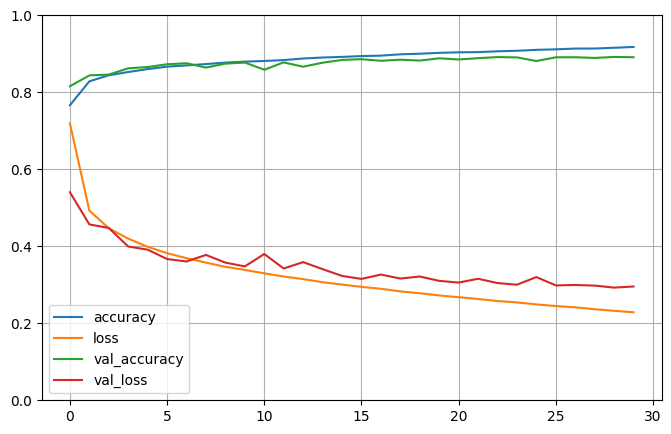

In [28]:
history_df.plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # y-axis values ranges from 0-1
plt.show()

## model.evaluate()

In [31]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8583 - loss: 57.4392


[59.63001251220703, 0.8555999994277954]

## model.predict()

In [42]:
X_sample = X_test[:3]
X_sample

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [43]:
X_sample.shape

(3, 28, 28)

In [45]:
y_proba = model.predict(X_sample)
y_proba

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

## model.predict_classes()

In [52]:
import numpy as np

y_pred = model.predict(X_sample)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [54]:
y_pred_classes = np.argmax(y_pred, axis=1)
y_pred_classes

array([9, 2, 1])

In [56]:
np.array(class_names)[y_pred_classes]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')